In [ ]:
#pip install --ignore-installed shiny

: 

In [26]:
from shiny import App, render, ui
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [ ]:
#pip install rpy2

In [27]:
from rpy2 import robjects

# `faithful$eruptions` from R
eruptions = robjects.r['faithful'][0]

#eruptions = np.random.normal(loc=3.5, scale=1.0, size=272)

In [59]:
app_ui = ui.page_fluid(
    ui.input_select(
        "n_breaks",
        "Number of bins in histogram (approximate):",
        choices=[10, 20, 35, 50],
        selected=20
    ),
    ui.input_checkbox(
        "individual_obs",
        "Show individual observations",
        value=False
    ),
    ui.input_checkbox(
        "density",
        "Show density estimate",
        value=False
    ),
    ui.output_plot("main_plot"),
    ui.output_ui("output_bw_adjust")
)

In [60]:
def server(input, output, session):
    @output
    @render.plot
    def main_plot():
        fig, ax = plt.subplots()
        n_breaks = int(input.n_breaks())
        hist_data = np.histogram(eruptions, bins=n_breaks, density=True)
        ax.bar(hist_data[1][:-1], hist_data[0], width=np.diff(hist_data[1]), edgecolor='black', align='edge')

        if input.individual_obs():
            ax.plot(eruptions, np.zeros_like(eruptions), 'r|', markersize=10)

        if input.density():
            bw_adjust = input.bw_adjust()
            kde = gaussian_kde(eruptions, bw_method=bw_adjust)
            x_grid = np.linspace(min(eruptions), max(eruptions), 1000)
            ax.plot(x_grid, kde(x_grid), color='blue')

        ax.set_xlabel("Duration (minutes)")
        ax.set_title("Geyser eruption duration")
        return fig

    @output
    @render.ui
    def output_bw_adjust():
        if input.density():
            return ui.input_slider(
                "bw_adjust",
                "Bandwidth adjustment:",
                min=0.2,
                max=2.0,
                value=1.0,
                step=0.2
            )
        return None


In [61]:
app = App(app_ui, server)

The following seems important to get asynchronous shiny
working properly.

In [1]:
import nest_asyncio
nest_asyncio.apply()

In [ ]:
if __name__ == "__main__":
    app.run()

### Histogram Module

The following runs with two copies of same module.
It follows `@module` directions in 
[Shiny for Python: Module Communication](https://shiny.posit.co/py/docs/module-communication.html).
I think I got `@module.ui` to work on multiple components.

In [15]:
%run hist2

In [16]:
hist_app()

INFO:     Started server process [33199]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:62949 - "GET / HTTP/1.1" 200 OK


INFO:     ('127.0.0.1', 62952) - "WebSocket /websocket/" [accepted]
INFO:     connection open


INFO:     connection closed


In [26]:
%run hist

In [ ]:
hist_app()

### Geyser Module

Same as hist2.

In [2]:
%run geyser

INFO:     Started server process [33518]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:62992 - "GET / HTTP/1.1" 200 OK


INFO:     ('127.0.0.1', 62994) - "WebSocket /websocket/" [accepted]
INFO:     connection open


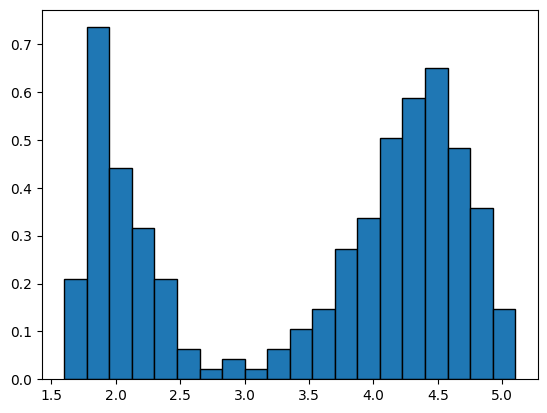

INFO:     connection closed


In [3]:
geyserApp()

In [ ]:
app_ui = ui.page_fluid(
        geyserInput("geyser"),
        geyserOutput("geyser"),
        geyserUI("geyser")
    )
def app_server(input, output, session):
    geyserServer("geyser")(input, output, session)

app = App(app_ui, app_server)

if __name__ == '__main__':
    app.run()

In [ ]:
geyserApp()